### Importing Necessary Libraries..

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Steps we are going to follow in this project..

> 1. Data Cleaning
2. EDA
3. Test Preprocessing(Feature Engineering)
4. Model Building
5. Model Evaluation
6. Model Improvement(Parameter Tunning)
7. Website building on Streamlit
8. Deploying on Heroku

### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

#### Dropping the non-useful columns..

In [7]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [9]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

#### We have removed the non-required columns..

### Let's rename the columns...

In [10]:
df.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [11]:
df.head(2)

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [12]:
df.describe().transpose()

,count,unique,top,freq
target,5572,2,ham,4825
message,5572,5169,"Sorry, I'll call later",30


In [13]:
df.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

### Let's check if the dataset contains any duplicate values or not..

> **duplicated** method helps to find the rows which contains duplicate values..

In [14]:
df[df.duplicated()]

,target,message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


### There are 403 row that contains duplicate information.. Let's drop those rows..

In [15]:
df=df[~df.duplicated()]

In [16]:
df.describe().transpose()

,count,unique,top,freq
target,5169,2,ham,4516
message,5169,5169,"Go until jurong point, crazy.. Available only ...",1


In [17]:
df.shape

(5169, 2)

### EDA(part :1)

<AxesSubplot:xlabel='target', ylabel='count'>

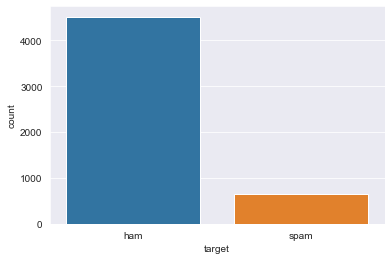

In [18]:
sns.set_style('darkgrid')
sns.countplot(df['target'])

### We can easily say that the dataset is quite imbalanced..

### Test Analysis..
> Let's find out how many **letters**,**words,sentences** used in each message..
 For that we need to import ***nltk*** library..

In [19]:
import nltk

In [20]:
!pip install nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MADHUMITA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Let's count number of characters in each sentence..

In [22]:
df['num_char']=df['message'].apply(len)

In [23]:
df.head(2)

,target,message,num_char
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


### Let's count number of characters in each sentence..

> ***nltk.word_tokenize*** function takes string as input and breaks them into separate words..

In [24]:
df['message'][1]

'Ok lar... Joking wif u oni...'

In [25]:
nltk.word_tokenize(df['message'][1])

['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...']

In [26]:
df['word_count']=df['message'].apply(lambda a : len(nltk.word_tokenize(a)))

In [27]:
df.head()

,target,message,num_char,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


### Let's count number of sentences in each message..

>> ***nltk.sent_tokenize*** function takes string as input and breaks them into separate words..

In [28]:
nltk.sent_tokenize(df['message'][5])

["FreeMsg Hey there darling it's been 3 week's now and no word back!",
 "I'd like some fun you up for it still?",
 'Tb ok!',
 'XxX std chgs to send, å£1.50 to rcv']

In [29]:
df['sen_count']=df['message'].apply(lambda a:len(nltk.sent_tokenize(a)))

In [30]:
df.head()

,target,message,num_char,word_count,sen_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


### EDA (part:2)

<AxesSubplot:xlabel='num_char', ylabel='word_count'>

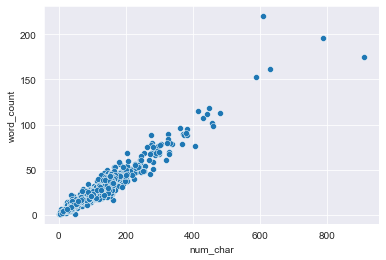

In [31]:
sns.scatterplot(df['num_char'],df['word_count'])

<AxesSubplot:xlabel='num_char', ylabel='sen_count'>

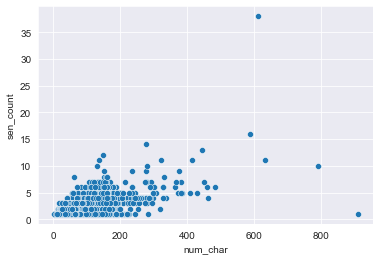

In [32]:
sns.scatterplot(df['num_char'],df['sen_count'])

<AxesSubplot:xlabel='word_count', ylabel='sen_count'>

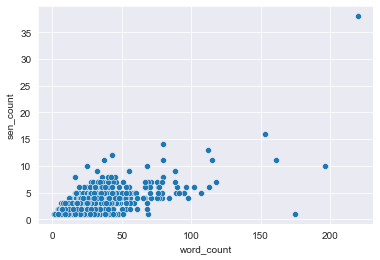

In [33]:
sns.scatterplot(df['word_count'],df['sen_count'])

<AxesSubplot:xlabel='target', ylabel='num_char'>

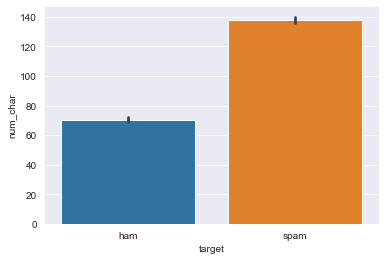

In [34]:
sns.barplot(df['target'],df['num_char'])

<AxesSubplot:xlabel='target', ylabel='word_count'>

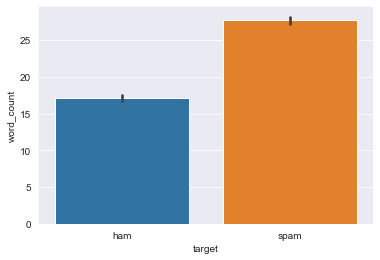

In [35]:
sns.barplot(df['target'],df['word_count'])

<AxesSubplot:xlabel='target', ylabel='sen_count'>

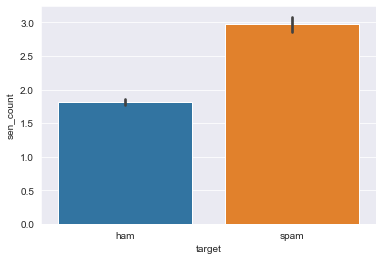

In [36]:
sns.barplot(df['target'],df['sen_count'])

### From the above analysis we can say that the number of characters are higher in Spam messages compared to Ham messages..

### Let's check the correlation with the target..

> But before that let's convert the target column into numerical column..

In [37]:
df['target'].replace({"ham":0,'spam':1},inplace=True)

<AxesSubplot:>

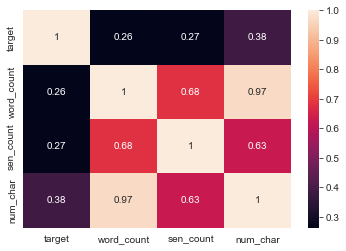

In [38]:
sns.heatmap(df[['target','word_count','sen_count','num_char']].corr(),annot=True)

>***From the above plot we can see that word_count,sen_count,num_char are highly corrlated to each other.. And if we keep using all the 3 features then it will create multicolinearity problem.. So, we are goin to drop two out of the 3 newly created columns.. We will keep num_char column as its correlation is little high compared to the other two features with respcet to the target feature..***

### Text Preprocessing:

>Data or Text preprocessing consists of some basic steps each time and these are. 
    
- Lower Case Conversion(Converts letter into lower case)
- Word Tokenization(Converts data into word tokens)
- Removing Special characters from the data
- Removing Stopwords and punctions from the data(Stopwords are words which helps in sentence formation but does not have any special meaning)
- Stemming(Converting words into their base forms)
    

In [39]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [40]:
def text_converter(a):
    sen=a.lower()
    token_word=nltk.word_tokenize(sen)
    new_token=[]
    
    for i in token_word:
        if i not in stopwords.words('English'):
            if i not in string.punctuation:
                if i.isalnum():### We will only keed Alpha numeric tokens..
                    new_token.append(ps.stem(i))
    return ' '.join(new_token)## Convert tokens into strings..

In [41]:
df['trans_msg']=df['message'].apply(lambda a:text_converter(a))

In [42]:
df.head()

,target,message,num_char,word_count,sen_count,trans_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Model Building:
> 
- First we need to vectorize our data using bagofwords.
- Then we will pass that data into our ML Algorithm.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer##(CountVectorizer: Bagofwords technique)

In [44]:
td=TfidfVectorizer()

In [46]:
X=td.fit_transform(df['trans_msg']).toarray()### If we do not use toarray() method then we will get sparse array which we want to avoid for ease of calculation purpose..

In [47]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
X.shape##(sms,words)

(5169, 6708)

In [49]:
y=df['target'].values

In [50]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

### Let's split up our data..

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [81]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB ## Well know that naive_bayes performs best for text data..

In [82]:
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

In [83]:
gnb.fit(X_train,y_train)
gnb_pred=gnb.predict(X_test)

In [84]:
mnb.fit(X_train,y_train)
mnb_pred=mnb.predict(X_test)

In [85]:
bnb.fit(X_train,y_train)
bnb_pred=bnb.predict(X_test)

### Checking the performance of the Models..

In [86]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score##as this is a high precision task..

In [87]:
print(confusion_matrix(bnb_pred,y_test))
print(classification_report(bnb_pred,y_test))
print(accuracy_score(bnb_pred,y_test))
print(precision_score(y_test,bnb_pred))

[[907  26]
 [  2  99]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       933
           1       0.79      0.98      0.88       101

    accuracy                           0.97      1034
   macro avg       0.89      0.98      0.93      1034
weighted avg       0.98      0.97      0.97      1034

0.9729206963249516
0.9801980198019802


In [88]:
print(confusion_matrix(mnb_pred,y_test))
print(classification_report(mnb_pred,y_test))
print(accuracy_score(mnb_pred,y_test))
print(precision_score(y_test,mnb_pred))

[[909  42]
 [  0  83]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       951
           1       0.66      1.00      0.80        83

    accuracy                           0.96      1034
   macro avg       0.83      0.98      0.89      1034
weighted avg       0.97      0.96      0.96      1034

0.9593810444874274
1.0


In [89]:
print(confusion_matrix(gnb_pred,y_test))
print(classification_report(gnb_pred,y_test))
print(accuracy_score(gnb_pred,y_test))
print(precision_score(y_test,gnb_pred))

[[785  20]
 [124 105]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       805
           1       0.84      0.46      0.59       229

    accuracy                           0.86      1034
   macro avg       0.85      0.72      0.75      1034
weighted avg       0.86      0.86      0.84      1034

0.8607350096711799
0.4585152838427948


### Let's test our model with different algorithms..

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [91]:
lr=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
mnb=MultinomialNB()
dct=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)

In [92]:
classifiers={
    'LR': lr,
    'SVC':svc,
    'MNB':mnb,
    'DCT':dct,
    'KNC':knc,
    'RFC':rfc
}

In [93]:
def trian_with_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [94]:
trian_with_classifier(dct,X_train,y_train,X_test,y_test)

(0.9400386847195358, 0.8315789473684211)

In [95]:
classifiers

{'LR': LogisticRegression(penalty='l1', solver='liblinear'),
 'SVC': SVC(gamma=1.0, kernel='sigmoid'),
 'MNB': MultinomialNB(),
 'DCT': DecisionTreeClassifier(max_depth=5),
 'KNC': KNeighborsClassifier(),
 'RFC': RandomForestClassifier(n_estimators=50, random_state=2)}

In [96]:
accuracy_scores=[]
precision_scores=[]

for name,clfs in classifiers.items():
    
    current_accuracy,current_precision=trian_with_classifier(clfs,X_train,y_train,X_test,y_test)
    
    
    print('For: ',name)
    print('Accuracy : ',current_accuracy)
    print('Precision : ',current_precision)
        
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For:  LR
Accuracy :  0.9545454545454546
Precision :  0.9239130434782609
For:  SVC
Accuracy :  0.9758220502901354
Precision :  0.9807692307692307
For:  MNB
Accuracy :  0.9593810444874274
Precision :  1.0
For:  DCT
Accuracy :  0.941972920696325
Precision :  0.8494623655913979
For:  KNC
Accuracy :  0.9052224371373307
Precision :  1.0
For:  RFC
Accuracy :  0.9700193423597679
Precision :  1.0


In [97]:
accuracy_scores

[0.9545454545454546,
 0.9758220502901354,
 0.9593810444874274,
 0.941972920696325,
 0.9052224371373307,
 0.9700193423597679]

In [98]:
precision_scores

[0.9239130434782609, 0.9807692307692307, 1.0, 0.8494623655913979, 1.0, 1.0]

In [99]:
performance_df=pd.DataFrame({'Algorithms':classifiers.keys(),
                            'Accuracy':accuracy_scores,
                            'Precision':precision_scores})

In [100]:
performance_df

,Algorithms,Accuracy,Precision
0,LR,0.954545,0.923913
1,SVC,0.975822,0.980769
2,MNB,0.959381,1.000000
3,DCT,0.941973,0.849462
4,KNC,0.905222,1.000000
5,RFC,0.970019,1.000000


### We are going to use RandomForest as the algorithm and will use TfIdf method as the vectorization technique.. When we will get raw data the workflow will be:             
  - Text Preprocessing
  - Vectorization of the processed text
  - Applying algorithm on the vector

In [101]:
import pickle

In [102]:
pickle.dump(td,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))

In [103]:
rfc.predict(X_test[0:1])

array([0], dtype=int64)

In [104]:
y_test[0]

0

In [115]:
df['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [116]:
text_converter(df['message'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [118]:
td.transform([text_converter(df['message'][0])]).toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [120]:
rfc.predict(td.transform([text_converter(df['message'][205])]).toarray())

array([0], dtype=int64)

In [121]:
y_test[205]

0